## Importing Libraries

In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sn
from sklearn import metrics

## Loading IRIS Dataset

In [364]:
iris = datasets.load_iris()

In [365]:
df_iris = pd.DataFrame(iris['data'],columns = iris['feature_names'])

In [366]:
df_iris['target'] = iris['target']

In [367]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Build Logistic Regression Model

In [368]:
iris_model = LogisticRegression(max_iter=1000)

In [369]:
X = df_iris.iloc[:,[0,1]]
y = df_iris['target']

In [370]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [371]:
iris_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [372]:
iris_model.intercept_, iris_model.coef_

(array([ 6.69601283,  1.23937402, -7.93538685]),
 array([[-2.36181485,  2.07689467],
        [ 0.60836042, -1.43469174],
        [ 1.75345443, -0.64220294]]))

## Plotting Decision Boundaries

In [373]:
print(iris_model.intercept_) 
print(iris_model.coef_)

weights0 = [iris_model.intercept_[0],iris_model.coef_[0,0],iris_model.coef_[0,1]]
weights1 = [iris_model.intercept_[1],iris_model.coef_[1,0],iris_model.coef_[1,1]]
weights2 = [iris_model.intercept_[2],iris_model.coef_[2,0],iris_model.coef_[2,1]]

[ 6.69601283  1.23937402 -7.93538685]
[[-2.36181485  2.07689467]
 [ 0.60836042 -1.43469174]
 [ 1.75345443 -0.64220294]]


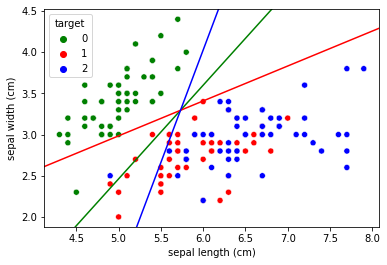

In [374]:
g =sn.scatterplot(x="sepal length (cm)",y="sepal width (cm)",
              hue="target",
              data=df_iris,palette=['green','red','blue']);

x1 = (-weights0[0] - weights0[2] * df_iris.iloc[0,1])/weights0[1]
x2 = (-weights0[0] - weights0[2] * df_iris.iloc[4,1])/weights0[1]

plt.axline((x1, df_iris.iloc[0,1]), (x2, df_iris.iloc[4,1]), color = "green")

x1 = (-weights1[0] - weights1[2] * df_iris.iloc[0,1])/weights1[1]
x2 = (-weights1[0] - weights1[2] * df_iris.iloc[4,1])/weights1[1]

plt.axline((x1, df_iris.iloc[0,1]), (x2, df_iris.iloc[4,1]), color = "red")

x1 = (-weights2[0] - weights2[2] * df_iris.iloc[0,1])/weights2[1]
x2 = (-weights2[0] - weights2[2] * df_iris.iloc[4,1])/weights2[1]

plt.axline((x1, df_iris.iloc[0,1]), (x2, df_iris.iloc[4,1]), color = "blue")